<a href="https://colab.research.google.com/github/jason2134/Artificial-Neural-Network-for-Gas-Classification/blob/main/PCA_ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset
import pandas as pd
from pydrive.drive import GoogleDrive
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

h2_link = 'https://drive.google.com/file/d/1KjJPM0RIbtd1jcDLzdujHUoBWcyvRnFm/view'
ch2o_link =  'https://drive.google.com/file/d/1hBzbtt65f1o36_hlRGJsCbvT5nGPzUOy/view'
tol_link = 'https://drive.google.com/file/d/1fG1lrvZKrGWiqiCr3T8O1UdIzCXv4r2I/view'
acetone_link = 'https://drive.google.com/file/d/15Hmc1MbivM_Abqz5C6FjtqKwjdUHBJpT/view'
# to get the id part of the file
h2_id = h2_link.split("/")[-2]
ch2o_id = ch2o_link.split("/")[-2]
tol_id = tol_link.split("/")[-2]
acetone_id = acetone_link.split("/")[-2]

def getCSV(id,csv):
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile(csv)

getCSV(h2_id,'h2.csv')
getCSV(ch2o_id,'ch2o.csv')
getCSV(tol_id,'tol.csv')
getCSV(acetone_id,'acetone.csv')

h2 = pd.read_csv('h2.csv')
ch2o = pd.read_csv('ch2o.csv')
tol = pd.read_csv('tol.csv')
acetone = pd.read_csv('acetone.csv')

h2['Gas'] = 'h2'
ch2o['Gas'] = 'ch2o'
tol['Gas'] = 'tol'
acetone['Gas'] = 'acetone'
df = pd.concat([h2,ch2o,tol,acetone])
df

,Au,Ni,Cu,Ag,Class,ppb,Gas
0,0.00252,0.00120,0.00160,0.00100,1,10,h2
1,0.00525,0.00330,0.00380,0.00280,1,20,h2
2,0.00810,0.00540,0.00613,0.00450,1,40,h2
3,0.01370,0.00880,0.00990,0.00730,1,80,h2
4,0.01650,0.01030,0.01169,0.00870,1,100,h2
5,0.02560,0.01510,0.01850,0.01270,1,200,h2
6,0.05035,0.03915,0.04420,0.03819,1,400,h2
7,0.23613,0.13107,0.12993,0.11271,1,1000,h2
8,0.58089,0.23312,0.24163,0.21071,1,2000,h2
9,1.34146,0.50687,0.57022,0.49804,1,4000,h2


[[ 0.0613737   0.00723936]
 [-0.04839404 -0.02567074]
 [-0.07244324 -0.02278006]
 [-0.05199821 -0.02384538]
 [-0.04169413 -0.02764643]
 [-0.02812493 -0.0096276 ]
 [-0.16275938 -0.07724917]
 [ 0.03954251 -0.06140017]
 [ 0.18249977 -0.06190081]
 [ 0.18612706 -0.06844937]
 [ 0.14165254 -0.05512456]
 [ 0.1429338  -0.04902578]
 [ 0.13303451 -0.03722123]
 [ 0.14257897 -0.01887692]
 [ 0.17218351 -0.00977897]
 [ 0.26565769  0.0017416 ]
 [ 0.3551793   0.02217097]
 [ 0.36385401  0.01942757]
 [ 0.37817713  0.0078589 ]
 [ 0.39713504  0.02690265]
 [ 0.33916351  0.05159971]
 [-0.08181554 -0.0573454 ]
 [-0.06174013  0.04701231]
 [-0.14697887  0.00590505]
 [-0.1604025  -0.00375566]
 [-0.13720469  0.00679592]
 [-0.08063609 -0.0497363 ]
 [-0.03010797 -0.02604589]
 [ 0.02948276  0.00058765]
 [ 0.11561282 -0.00775253]
 [ 0.19852597 -0.00845041]
 [ 0.10796741 -0.01808917]
 [-0.15524278  0.00227174]
 [-0.10431671 -0.04366954]
 [-0.128467   -0.05149796]
 [-0.1471051  -0.05546929]
 [-0.13609404 -0.05947965]
 

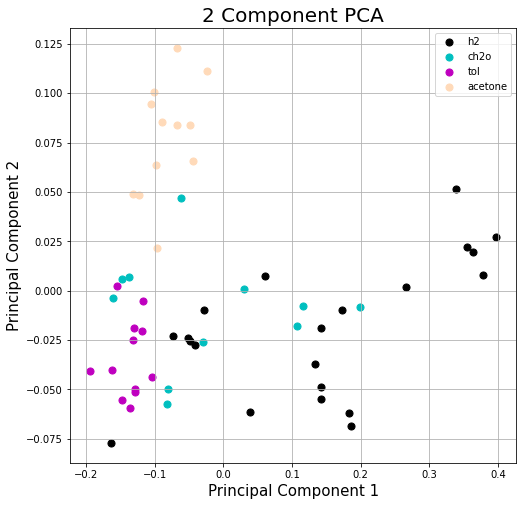

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn import preprocessing

features = ['Au', 'Ni', 'Cu', 'Ag']
df = df.dropna()
x = df.loc[:,'Au':'Ag'].values #Differentiate the input vectors
y = df.loc[:, ['Gas']] #Differentiate the output vectors

x = preprocessing.normalize(x, norm='l2') # normalization technique that modifies the dataset values in a way that in each row 
                                          # the sum of the squares will always be up to 1. It is also called least squares.
pca = PCA(n_components=2)

test = df['Gas'].reset_index(drop = True)

principalComponents = pca.fit_transform(x)
print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) # PC1 = Axis that spans most variation in data (longest distance) / PC2 = Aixs spans second most variation, and so on
                                                                           
finalDf = pd.concat([principalDf, test], axis = 1)

############## Plot Graph to see the results
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [ 'h2','ch2o','tol','acetone']
colors = ['k', 'c', 'm', 'peachpuff']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Gas'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
type(finalDf)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
from torch.utils.data import Dataset
import torch
# Format & Pre-process dataset
import numpy as np
import pandas as pd
import torch
import time
import torch.nn as nn # pytorch for trainning neural network
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
######## Encode FinalDf
ann_input = pd.get_dummies(finalDf)
ann_input = shuffle(ann_input).reset_index(drop=True)
ann_x = ann_input.loc[:,'principal component 1': 'principal component 2'].values
ann_y = ann_input.loc[:,'Gas_acetone': 'Gas_tol'].values
X_train, X_test, y_train, y_test = train_test_split(ann_x, ann_y, test_size=0.2, random_state=40)
#print(type(y_train)); 
#print(ann_input)
#print(ann_x)

ann_y

In [ ]:
'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

#confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
#print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))
'''

"\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import classification_report,confusion_matrix\nimport seaborn as sns\nmlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)\nmlp.fit(X_train,y_train)\npredict_train = mlp.predict(X_train)\npredict_test = mlp.predict(X_test)\n\n#confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))\n#print(confusion_matrix(y_train,predict_train))\nprint(classification_report(y_train,predict_train))\nprint(classification_report(y_test,predict_test))\n"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class ClassifierDataset(Dataset):
  def __init__(self,x,y): # defines what parameters are needed when initializing this class
    self.x = x
    self.y = y
  def __getitem__(self, index): #The magic method __getitem__ is basically used for accessing list items, dictionary entries, array elements etc. It is very useful for a quick lookup of instance attributes.
    return self.x[index], self.y[index] 
  def __len__ (self):
    return len(self.x)

train_dataset = ClassifierDataset(X_train, y_train)
test_dataset = ClassifierDataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader
EPOCHS = 1000
BATCH_SIZE = 4 #8 , 4
LEARNING_RATE = 0.0007 #0.0002, 0.0004
NUM_FEATURES = 2
NUM_CLASSES = 4

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE
                          #sampler=weighted_sampler
)

test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
class MulticlassClassification(nn.Module):
  def __init__(self):
    super(MulticlassClassification, self).__init__()

    self.layer_1 = nn.Linear(2, 500) #(2, 512) : overfit threshold (2,200,100,50,4)
    self.layer_2 = nn.Linear(500, 100) #(512, 128
    self.layer_3 = nn.Linear(100, 50) #(128, 64)
    self.layer_out = nn.Linear(50, 4) #(64, 4)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)
    self.softmax = nn.Softmax
    #self.batchnorm1 = nn.BatchNorm1d(200)
    #self.batchnorm2 = nn.BatchNorm1d(100)
    #self.batchnorm3 = nn.BatchNorm1d(50)
    #self.sigmoid = nn.Sigmoid
    #self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    x = self.layer_1(x)
    x = self.relu(x)

    x = self.layer_2(x)
    x = self.relu(x)
    x = self.dropout(x)

    x = self.layer_3(x)
    x = self.relu(x)
    x = self.dropout(x)

    x = self.layer_out(x)
    return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
# Initialize the model, optimizer, and loss function
model = MulticlassClassification()
model = model.double()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
#optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=2, out_features=500, bias=True)
  (layer_2): Linear(in_features=500, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


In [ ]:
def multi_acc(y_pred, y_test):
    total_tensor = torch.empty(len(y_pred),4)
    correct_pred = 0
    for index,value in enumerate(y_pred):
      total_tensor[index] = transform_grad(value)
      if(str(total_tensor[index].tolist()) == str(y_test[index].tolist())):
        correct_pred = correct_pred + 1
    #print("y pred:", total_tensor)
    #print("y test:", y_test)
    acc = correct_pred / len(y_test)
    #print(correct_pred)
    acc = torch.tensor(acc)
    acc = torch.round(acc * 100)
    return acc

def transform_grad(pred_value):
  outputs = []
  for index,value in enumerate(pred_value):
    if (value == torch.max(pred_value)):
      value = 1
    else:
      value = 0
    outputs.append(value)
  tensor_out = torch.tensor(outputs)
  return tensor_out

accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
import numpy as num 
#min_val_loss = num.Inf
#epochs_no_improve = 0
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0

    model.train()
    for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device).type(torch.DoubleTensor) #copy dataset to CPU / GPU, and do computation there
      optimizer.zero_grad()
      y_train_pred = model(X_train_batch.double()).type(torch.DoubleTensor)

      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = multi_acc(y_train_pred, y_train_batch)

      # L2 Norm
      #lambda1, lambda2 = 0.5, 0.001
      #l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
      #train_loss = train_loss + lambda2 * l2_norm

      train_loss.backward() 
      #loss.backward() computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x.
      optimizer.step()
      #optimizer.step updates the value of x using the gradient x.grad
'''
Gradient Descent Process:
optimizer.zero_grad(): 把梯度置零，也就是把loss关于weight的导数变成0.
  - 当网络参量进行反馈时，梯度是累积计算而不是被替换，
  - When dealing with each batch, the aggregated data from other batches is not needed, therefore clear it by zero_grad( )
train_loss.backward( ): Perform back propagation
optimizer.step ( ):  Update the parameters with the step to take
'''
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()

    # Validation
    with torch.no_grad():
      val_epoch_loss = 0
      val_epoch_acc = 0

      model.eval()

      for X_val_batch, y_val_batch in test_loader:
        X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device).type(torch.DoubleTensor)
        y_val_pred = model(X_val_batch.double()).type(torch.DoubleTensor)
        val_loss = criterion(y_val_pred, y_val_batch)

        # L2 Norm
        #lambda1, lambda2 = 0.5, 0.001
        #l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        #val_loss = val_loss + lambda2 * l2_norm

        val_acc  = multi_acc(y_val_pred, y_val_batch)

        val_epoch_loss += val_loss.item()
        val_epoch_acc  += val_acc.item()
      
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(test_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(test_loader))
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | test Loss: {val_epoch_loss/len(test_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| test Acc: {val_epoch_acc/len(test_loader):.3f}')

Begin training.


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 1.40537 | test Loss: 1.44592 | Train Acc: 18.182| test Acc: 8.333
Epoch 002: | Train Loss: 1.38928 | test Loss: 1.43358 | Train Acc: 22.727| test Acc: 8.333
Epoch 003: | Train Loss: 1.40313 | test Loss: 1.41142 | Train Acc: 20.455| test Acc: 8.333
Epoch 004: | Train Loss: 1.38428 | test Loss: 1.39317 | Train Acc: 25.000| test Acc: 16.667
Epoch 005: | Train Loss: 1.37986 | test Loss: 1.36921 | Train Acc: 20.455| test Acc: 58.333
Epoch 006: | Train Loss: 1.37346 | test Loss: 1.34937 | Train Acc: 27.273| test Acc: 66.667
Epoch 007: | Train Loss: 1.38628 | test Loss: 1.33078 | Train Acc: 25.000| test Acc: 66.667
Epoch 008: | Train Loss: 1.36337 | test Loss: 1.30859 | Train Acc: 34.091| test Acc: 66.667
Epoch 009: | Train Loss: 1.35269 | test Loss: 1.26003 | Train Acc: 38.636| test Acc: 58.333
Epoch 010: | Train Loss: 1.33128 | test Loss: 1.19264 | Train Acc: 43.182| test Acc: 58.333
Epoch 011: | Train Loss: 1.34442 | test Loss: 1.15100 | Train Acc: 34.091| test Acc

In [ ]:
!mkdir -p saved_model
torch.save(model.state_dict(),'saved_model/ann')
#torch.save(model.state_dict(), "/")